In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [155]:

def points_d(table, freq=1, smooth_width=None):
    r = table['t']
    res = 1/(2*np.diff(list(r)))*freq
    return r[:-1], uniform_filter1d(res, smooth_width) if smooth_width else res

def points(table):
    r = table['t']
    return list(r), range(len(r))
#%matplotlib widget

def plot_coords(data, name=None, title='', sm_w=3, freq=1):
    fig = plt.figure(figsize=(10, 7))
    
    axes = fig.subplots(2)
    axes[0].set_title(title)
    axes[0].scatter(*points(data))
    axes[0].set_ylabel('Число оборотов')
    axes[0].set_xlabel('Время, с')

    
    axes[1].set_ylabel('Частота, Гц')
    axes[1].set_xlabel('Время, с')
    axes[1].plot(*points_d(data, smooth_width=sm_w, freq=freq))
    axes[1].set_ylim(bottom=0)
    
    if name: fig.savefig("img/" + name + '.png')

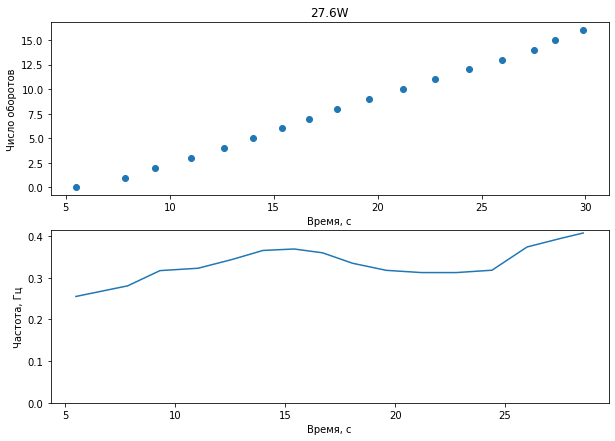

In [137]:
plot_coords(pd.read_csv("data/η", delimiter=";", comment = "#"), 'η', title='27.6W')

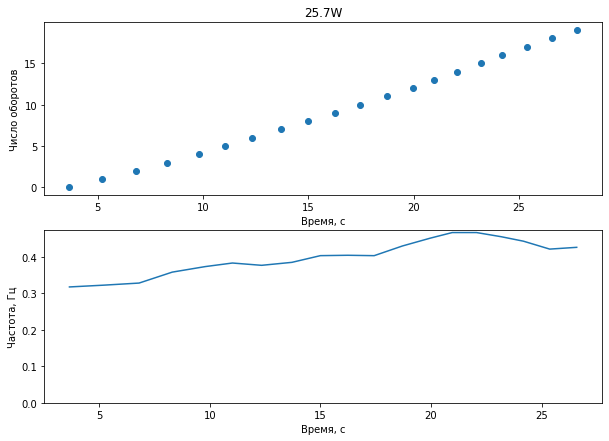

In [138]:
plot_coords(pd.read_csv("data/n2", delimiter=";", comment = "#"), 'η2', "25.7W")

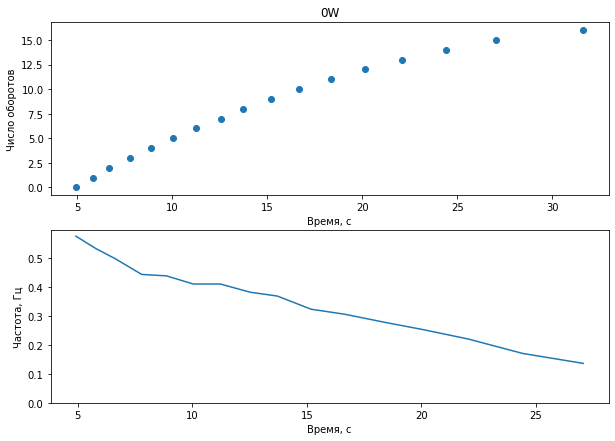

In [139]:

plot_coords(pd.read_csv("data/Торможение прогресса", delimiter=";", comment = "#"), 'Тормоз', "0W")

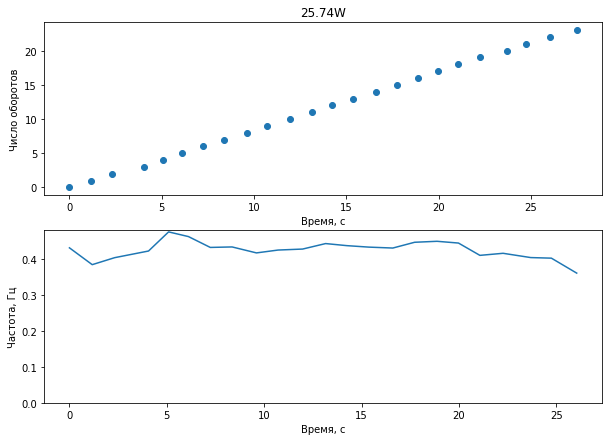

In [140]:
plot_coords(pd.read_csv("data/Загадочное измерение", delimiter=";", comment = "#"), 'Тормоз', "25.74W")

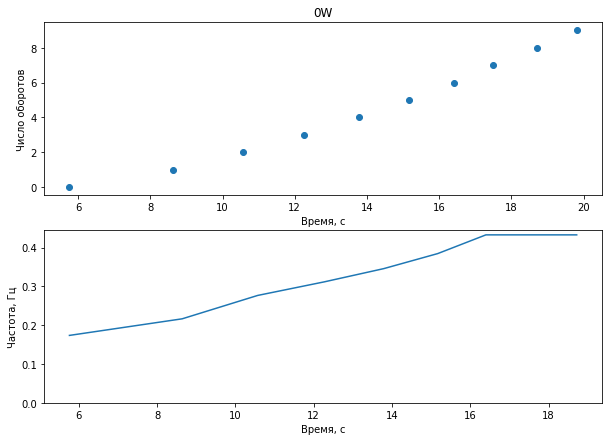

In [141]:

plot_coords(pd.read_csv("data/Взеты и паденения Османскорй империи", delimiter=";", comment = "#"), 'Падение', "0W", sm_w=2)

In [48]:
rots = pd.read_csv("data/Обороты", delimiter=";", comment = "#")

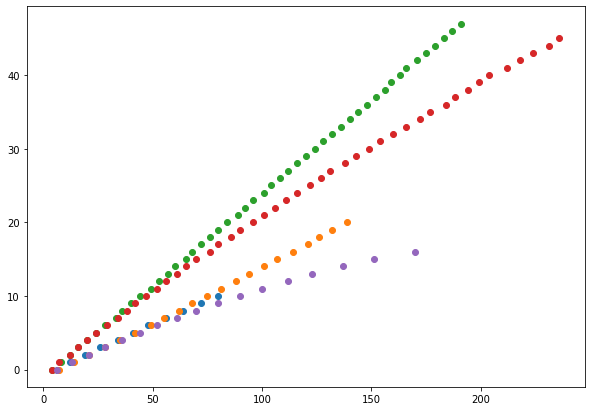

In [149]:
import re

def convert_time(s):
    t = re.match("(-?\d\d?):(\d\d(.\d+)?)", s)
    if t == None:
        return float(s)
    t = t.groups()
    return int(t[0])*60 + float(t[1])

plt.figure(figsize=(10, 7))
for i in rots.groupby('n'):
    i = i[1]
    i['t'] = i['time'].apply(convert_time)
    plt.scatter(*points(i))
#    plt.plot(*points_d(i, freq=10))
plt.savefig('img/coords.png')

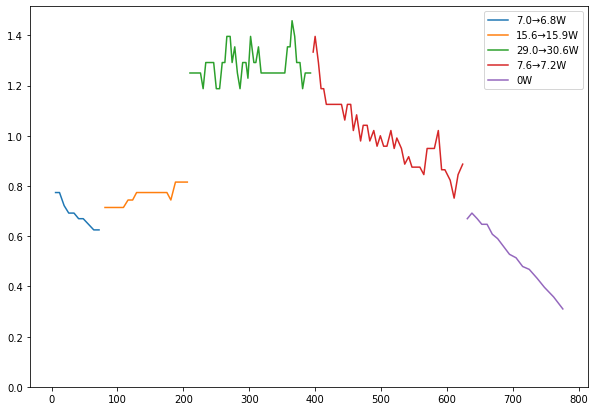

In [151]:


plt.figure(figsize=(10, 7))
t = 0
c = 0
names = ['7.0→6.8W', '15.6→15.9W', '29.0→30.6W', '7.6→7.2W', '0W']
for i in rots.groupby('n'):
    i = i[1]
    
    i['t'] = i['time'].apply(convert_time) + t
    t += np.array(i['t'])[-1] - np.array(i['t'])[0]
    plt.plot(*points_d(i, freq=10, smooth_width=4), label=names[c])
    c += 1
plt.legend()
plt.ylim(bottom=0)
plt.savefig('img/speeds.png')

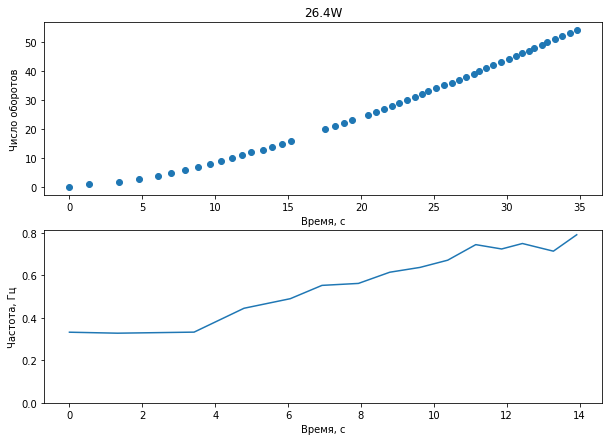

In [167]:
plot_coords(pd.read_csv("data/раскрутка_1", delimiter=";", comment = "#"), 'Крут_1', "26.4W")

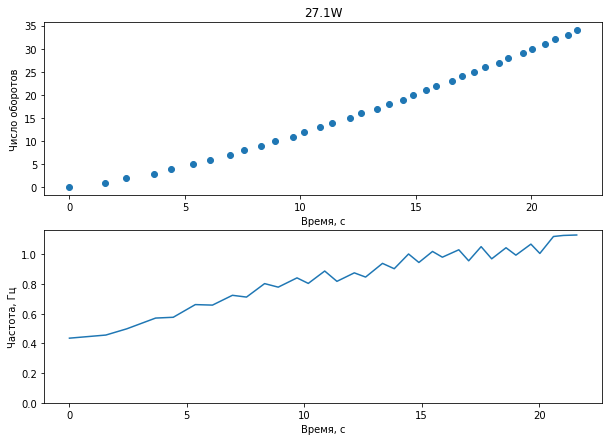

In [164]:
plot_coords(pd.read_csv("data/раскрутка_2", delimiter=";", comment = "#"), 'Крут_2', "27.1W", sm_w=5)

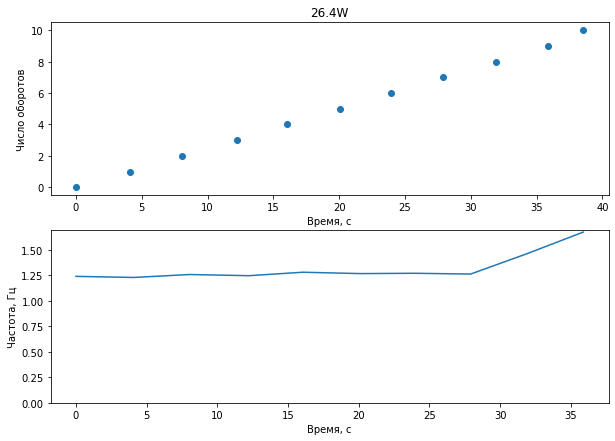

In [156]:
plot_coords(pd.read_csv("data/раскрутка_3", delimiter=";", comment = "#"), 'Крут_3', "26.4W", freq=10)

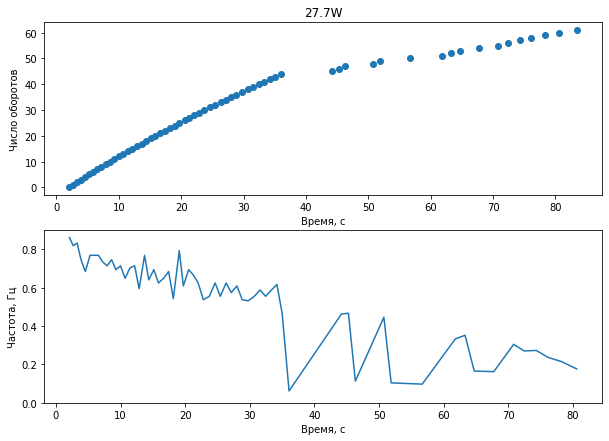

In [169]:
d = pd.read_csv("data/обращение", delimiter=";", comment = "#")
d['t'] = d['t'].apply(convert_time)
plot_coords(d, 'Оборотень', "27.7W", sm_w=1)

In [160]:
d

,t
0,2.08
1,2.66
2,3.27
3,3.87
4,4.54
...,...
57,1:14.32
58,1:16.15
59,1:18.26
60,1:20.59
